# Column & Opinion analysis

In this example, a predefined author in a newspaper will be analyzed. At first, opinions will be retrieved from a given page, then some string manipulation will be applied to the retrieved data. By using predefined NLTK, word frequencies will be plotted in order to have an impression of what the author mostly emphasize in the opinion.

In [1]:
# load required libraries
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import re
import datetime
import locale

# set date/language as defined in the system
locale.setlocale(locale.LC_ALL, '')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# define newspaper and author
url = 'https://t24.com.tr/yazarlar'
author = 'bekir-agirdir'
html_page = urllib.request.urlopen(url+'/'+author)
soup = BeautifulSoup(html_page, 'html.parser')

### Retrieve the opinions selected specifically after the municipality election

In this section, a list of selected opinions and their dates will be retrieved from the given webpage. The opinions are especially chosen for the ones written after the municipality election, which has been taken on 31-March-2019.

In [3]:
# function to retrieve links for a given html page
def getLinks(url, soup):
  links = []
  skip_date = False            # skip date flag
  # loop over div _1fE_V class containing information
  for div in soup.select('div[class*=_1fE_V]'):
      # search for links by using regex
      link = div.find('a', href = re.compile(r'[/]([a-z]|[A-Z])\w+')).attrs['href']
      link = url[:-9]+link
      links.append(link)
  return links

### Dive into the retrieved data munging

At this step, some data munging procedures, such as removing numbers and stopwords, to identify and create a list of specific words.

In [4]:
# function to retrieve opinion for a given html page
def getOpinion(url):
  page = urllib.request.urlopen(url)
  soup = BeautifulSoup(page, 'html.parser')
  # loop over div _1NMxy class containing information
  for div in soup.select('div[class*=_1NMxy]'):
      data = div.find_next().text
      remove_after = data.find('TIKLAYIN')
  # ignore unneccessary strings after
  data = data[:remove_after]
  return data

In [5]:
# function to clean opinion data retrieved from given webpage
def cleanData(text):
  text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', str(text)) # (step-1 to step-3)
  text = re.sub(r'\s*\(.*\)\s*', '', str(text))       # remove paranthesis
  pattern = r'[{}]'.format(',.;“”')                   # create special pattern
  text = re.sub(pattern, "", str(text))               # remove pattern
  tokens = text.split()
  stops = set(stopwords.words('turkish'))
  tokens = [t for t in tokens if not t in stops]
  return tokens

In [13]:
links = getLinks(url, soup)
print(links[0])
print(getOpinion(links[0]))
# for l in links:
#   print(l)
#   print(getOpinion(l))
#   print('\n###########################################\n')

https://t24.com.tr/yazarlar/bekir-agirdir/turkiye-nin-onundeki-tarihi-firsat,36943




İran’da kadınların başlattığı başkaldırı sürüyor. Dünya nefesini tuttu olacakları bekliyor. İslamcı ve otoriter rejimin yasak ve şiddetine karşı kadınların başlattığı eylemler son derece anlamlı. Buna cılız da olsa Afganistan’da kadınların Taliban rejimine direnişlerini de ekleyebiliriz. Ama temel bir sorun var. Korkarım ki on yıl önce benzeri Arap Baharı olarak adlandırılan halkların ayaklanmalarında yaşadığımız süreçler tekrarlanacak. Hatta Turuncu Devrimler olarak adlandırılan kuzeyimizdeki ülkelerde yaşananlar da benzer şekilde sonlanmıştı. 
Artık günümüzde toplumların eşitlik adalet taleplerinin, ülkelerindeki otoriter rejimlere başkaldırıların önünde durmak mümkün değil. Sosyal medya ve internet üzerinden haber ve bilgi akışı sayesinde hemen her yerde mağdurların, yoksulların, kadınların, gençlerin özgürlük ve ekonomiden pay alma talepleri yükseliyor, otoriter ve keyfi yönetimlere itirazları so

### Definition of some word stemming methods

There are some predefined word stemming modules to specify word stemma. In this section, tree different functions are presented for this aim.

In [7]:
from TurkishStemmer import TurkishStemmer

# function to find root of individual words
def TurkishStemmerAnalysis(data):
    stemmer = TurkishStemmer()
    return [stemmer.stem(t) for t in data]

In [8]:
from snowballstemmer import stemmer

# function to find root of individual words
def SnowballStemmerAnalysis(data):
    findRoot = stemmer('turkish')
    return findRoot.stemWords(data)

### Finalization by word of cloud

In the last step, frequencies of the words for the selected opinions, specifically after the municipality election, are presented as a word of clouds. The selection criteria while constructing word clouds is assigned to identify adjectives in the given opinion.

In [9]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

# function to draw wordCloud
def drawWordCloud(data, title, color = 'black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=set(stopwords.words('turkish')),
                         background_color=color,
                         width=2000,
                         height=1500
                         ).generate(cleaned_word)
    plt.figure(figsize=(12, 12))
    plt.title('{}'.format(title), fontsize=22)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

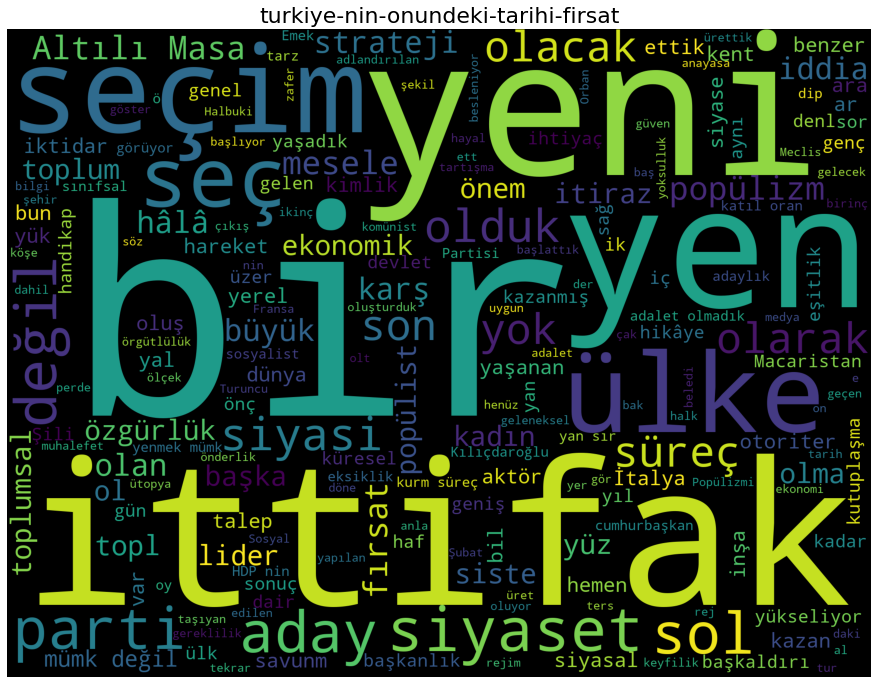

In [10]:
wordList = TurkishStemmerAnalysis(cleanData(getOpinion(links[0])))
title = links[0].split('/')[-1][:-6]
drawWordCloud(wordList, title)

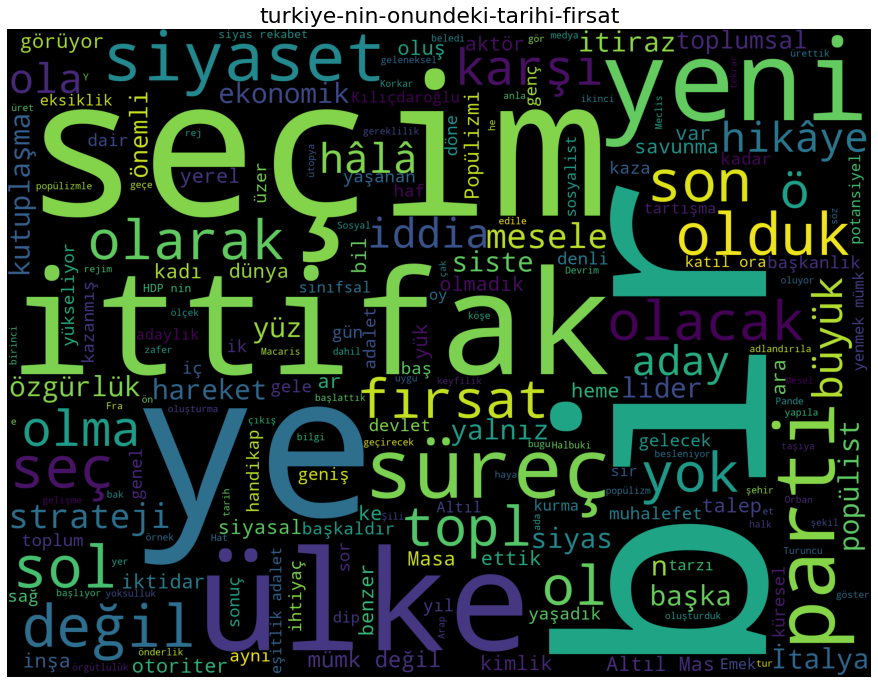

In [11]:
wordList = SnowballStemmerAnalysis(cleanData(getOpinion(links[0])))
title = links[0].split('/')[-1][:-6]
drawWordCloud(wordList, title)

In [12]:
# for link in links:
#     data = cleanData( getOpinion(link) )
#     wordList = TurkishStemmerAnalysis(data)
#     title = link.split('/')[-1][:-6]
#     drawWordCloud(wordList, title)